In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_alumnos = pd.read_csv('Data/Base Aprender estudiantes 6 primaria 2022 – Muestral L y M.csv', sep=';')

/var/folders/py/f996dn15339gcpsqq98w6kd80000gn/T/ipykernel_83196/2403431140.py:1: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,111,112,113) have mixed types. Specify dtype option on import or set low_memory=False.
  df_alumnos = pd.read_csv('Data/Base Aprender estudiantes 6 primaria 2022 – Muestral L y M.csv', sep=';')


In [3]:
df_alumnos = df_alumnos.iloc[:,[0,105,106]]

In [4]:
df_alumnos_sf = df_alumnos.loc[df_alumnos.jurisdiccion == 82]

In [5]:
df_Ldesemp_sf = pd.DataFrame(df_alumnos_sf['ldesemp'])  
df_Mdesemp_sf = pd.DataFrame(df_alumnos_sf['mdesemp'])

In [6]:
df_Ldesemp_sf.reset_index(inplace=True)
df_Ldesemp_sf.drop(['index'],axis=1,inplace=True)
df_Mdesemp_sf.reset_index(inplace=True)
df_Mdesemp_sf.drop(['index'],axis=1,inplace=True)

In [7]:
df_Ldesemp_sf = df_Ldesemp_sf.replace(' ',np.NaN)
df_Ldesemp_sf.dropna()
df_Mdesemp_sf = df_Mdesemp_sf.replace(' ',np.NaN)
df_Mdesemp_sf.dropna()

,mdesemp
0,3
1,3
2,2
3,3
4,3
...,...
7375,2
7376,1
7377,2
7380,1


In [8]:
df_Ldesemp_sf_gb = pd.DataFrame(df_Ldesemp_sf.groupby(['ldesemp'])['ldesemp'].count())
df_Mdesemp_sf_gb = pd.DataFrame(df_Mdesemp_sf.groupby(['mdesemp'])['mdesemp'].count())
df_Ldesemp_sf_gb.columns = ['Cantidad']
df_Mdesemp_sf_gb.columns = ['Cantidad']
df_Ldesemp_sf_gb.reset_index(inplace=True)
df_Mdesemp_sf_gb.reset_index(inplace=True)

In [20]:
df_Ldesemp_sf_gb = df_Ldesemp_sf_gb.replace(
    ['1','2','3','4'],
    ['Debajo del básico','Básico','Satisfactorio','Avanzado'])
df_Mdesemp_sf_gb = df_Mdesemp_sf_gb.replace(
    ['1','2','3','4'],
    ['Debajo del básico','Básico','Satisfactorio','Avanzado'])

In [25]:
cuenta = [
    [df_Ldesemp_sf_gb.iloc[0,1],df_Ldesemp_sf_gb.iloc[1,1]+df_Ldesemp_sf_gb.iloc[2,1]+df_Ldesemp_sf_gb.iloc[3,1]],
    [df_Mdesemp_sf_gb.iloc[0,1],df_Mdesemp_sf_gb.iloc[1,1]+df_Mdesemp_sf_gb.iloc[2,1]+df_Mdesemp_sf_gb.iloc[3,1]]
]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


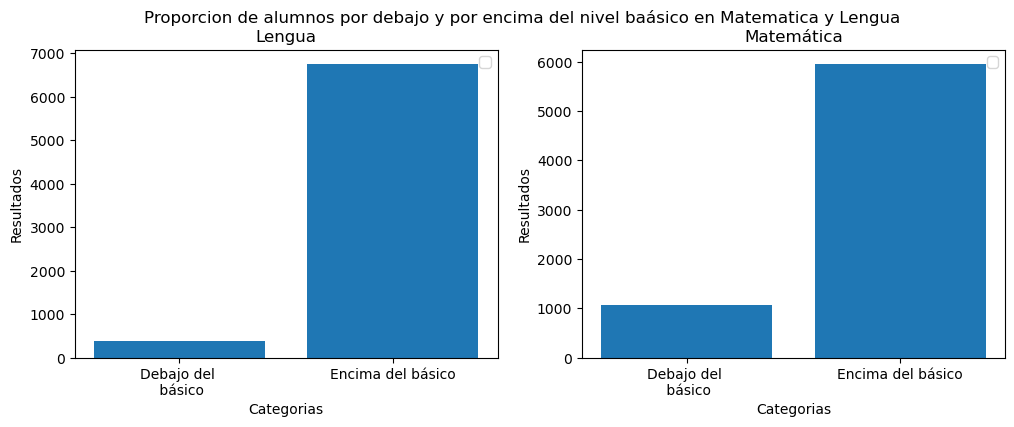

In [32]:
categorias = ['Debajo del \n básico','Encima del básico']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Proporcion de alumnos por debajo y por encima del nivel baásico en Matematica y Lengua ', fontsize=12 )
ax1.bar(categorias, cuenta[0])
ax1.set_xlabel('Categorias')
ax1.set_ylabel('Resultados')
ax1.set_title('Lengua')

ax2.bar(categorias, cuenta[1])
ax2.set_xlabel('Categorias')
ax2.set_ylabel('Resultados')
ax2.set_title('Matemática')

ax1.legend()
ax2.legend()

plt.show()